<a href="https://colab.research.google.com/github/k-dinakaran/automation-of-wordpress-post-publication-using-AI-tools/blob/main/Implement_AI_based_tools_for_SEO_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset creation (replace with your actual dataset)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Organic Traffic': np.random.normal(1000, 50, 100).tolist(),
    'Keyword Rankings': np.random.normal(50, 5, 100).tolist(),
    'Bounce Rate': np.random.normal(40, 3, 100).tolist(),
    'Backlinks': np.random.normal(100, 10, 100).tolist()
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Introduce an anomaly (a sharp drop in traffic on a specific date)
df.loc[80:85, 'Organic Traffic'] = df.loc[80:85, 'Organic Traffic'] * 0.5  # Sudden drop in traffic
df.loc[40:45, 'Keyword Rankings'] = df.loc[40:45, 'Keyword Rankings'] * 1.5  # Sudden spike in rankings

# Display first few rows
print(df.head())


        Date  Organic Traffic  Keyword Rankings  Bounce Rate   Backlinks
0 2023-01-01      1004.823444         48.449355    39.201174  121.762658
1 2023-01-02      1042.498884         42.586490    46.314623   92.363141
2 2023-01-03      1112.799975         47.658830    35.952216   88.332402
3 2023-01-04       958.458892         53.897187    41.052097  108.973964
4 2023-01-05      1015.030110         57.299244    42.769994   80.002573


In [2]:
from sklearn.ensemble import IsolationForest

# Prepare the data for anomaly detection (focus on specific metrics)
metrics = ['Organic Traffic', 'Keyword Rankings', 'Bounce Rate', 'Backlinks']
X = df[metrics]

# Initialize the Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X)

# -1 indicates an anomaly, 1 indicates normal
df['Anomaly'] = df['Anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Show anomalies
anomalies = df[df['Anomaly'] == 'Anomaly']
print(anomalies)


         Date  Organic Traffic  Keyword Rankings  Bounce Rate   Backlinks  \
41 2023-02-11      1070.895805         79.813826    37.693673   97.192723   
80 2023-03-22       472.254501         63.892568    40.202650   90.070466   
83 2023-03-25       457.092795         33.528275    40.919706   79.078581   
85 2023-03-27       484.220989         41.474478    34.817185  109.612393   
98 2023-04-09       892.606964         48.447682    31.934876   92.733086   

    Anomaly  
41  Anomaly  
80  Anomaly  
83  Anomaly  
85  Anomaly  
98  Anomaly  


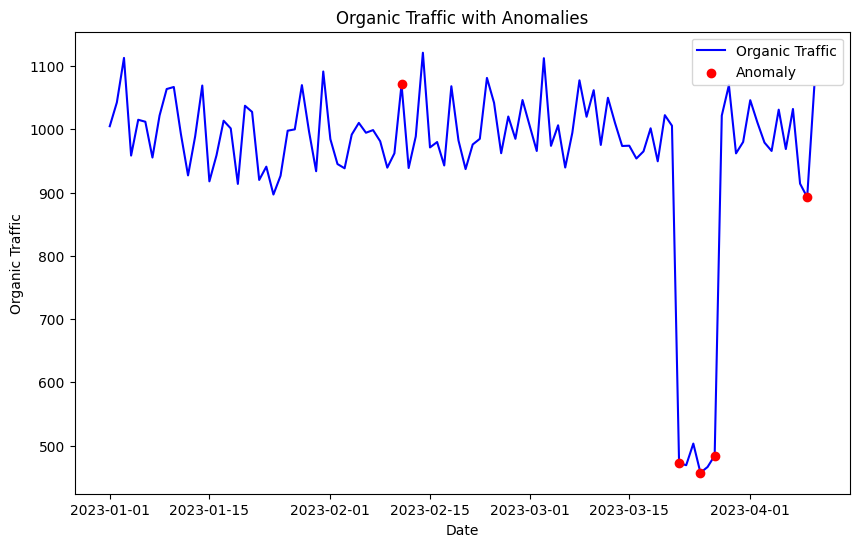

In [3]:
plt.figure(figsize=(10, 6))

# Plot organic traffic
plt.plot(df['Date'], df['Organic Traffic'], label='Organic Traffic', color='blue')

# Highlight anomalies
anomalies_dates = df[df['Anomaly'] == 'Anomaly']['Date']
anomalies_traffic = df[df['Anomaly'] == 'Anomaly']['Organic Traffic']

plt.scatter(anomalies_dates, anomalies_traffic, color='red', label='Anomaly', zorder=5)

plt.xlabel('Date')
plt.ylabel('Organic Traffic')
plt.title('Organic Traffic with Anomalies')
plt.legend()
plt.show()


In [4]:
# Generate alerts for detected anomalies
if not anomalies.empty:
    print("SEO Anomaly Detected!")
    for index, row in anomalies.iterrows():
        print(f"Date: {row['Date']} - Anomaly in {metrics}")
else:
    print("No anomalies detected.")


SEO Anomaly Detected!
Date: 2023-02-11 00:00:00 - Anomaly in ['Organic Traffic', 'Keyword Rankings', 'Bounce Rate', 'Backlinks']
Date: 2023-03-22 00:00:00 - Anomaly in ['Organic Traffic', 'Keyword Rankings', 'Bounce Rate', 'Backlinks']
Date: 2023-03-25 00:00:00 - Anomaly in ['Organic Traffic', 'Keyword Rankings', 'Bounce Rate', 'Backlinks']
Date: 2023-03-27 00:00:00 - Anomaly in ['Organic Traffic', 'Keyword Rankings', 'Bounce Rate', 'Backlinks']
Date: 2023-04-09 00:00:00 - Anomaly in ['Organic Traffic', 'Keyword Rankings', 'Bounce Rate', 'Backlinks']
